# Definición del problema

El problema consiste en realizar la predicción de los sobrevivientes del titanic de los datos de prueba en base a los datos de entrenamiento, donde se sabe cuáles son los sobrevivientes

En este notebook pretendo realizar un analisis de datos similar presente en el siguiente notebook https://www.kaggle.com/code/santtiagolozano/predicci-n-de-sobrevivientes-del-titanic, con algunas breves diferencias, como el hecho de escoger en base a los datos cuáles de estos nos pueden aportar información relevante para la respectiva predicción, y encontrar un patron en base a los respectivos datos

Ahora vamos a cargar todas las librerias que vayamos a necesitar para poder aplicar los diferentes modelos, además de que voy a intentar aplicar un modelo de redes neuronales para ver si puedo mejorar los resultados de predicción, que quizas en otros modelos no se puede encontrar

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
datos_entrenamiento = pd.read_csv("/kaggle/input/titanic/train.csv")
datos_prueba = pd.read_csv("/kaggle/input/titanic/test.csv")

# Analisis de datos

In [3]:
datos_entrenamiento.shape

(891, 12)

In [4]:
datos_prueba.shape

(418, 11)

Esto quiere decir que en el conjunto de datos de entrenamiento tenemos 891 filas y 12 columnas, y en el conjunto de datos de prueba tenemos 418 filas y 11 columnas, una menos, vamos a ver la información contenida en cada una de las columnas correspondientes

In [5]:
datos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
datos_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Como era de esperarse, la columna que falta en los datos de prueba corresponde a la columna de los supervivientes, o *Survived*

Ahora vamos a caracterizar cada una de las columnas:
* PassengerId = Identificación del pasajero
* Pclass = Tipo de pasaporte
* Name = Cada uno de los diferentes nombres que identifican a cada uno de los pasajeros
* Sex = El sexo de cada uno de los diferentes pasajeros presentes en el titanic
* Age = La edad correspondiente de cada pasajero
* SibSp = La cantidad de hermanos que tiene cada uno de los pasajeros
* Parch = Número de padres o hijos 
* Ticket = Número de boleto
* Fare = Precio del boleto del pasaje
* Cabin = Cabina del pasajero en el barco
* Embarked = Puerto en el que embarco:
       * C: Cherboug-Francia
       * Q: Queenstown-Irlanda
       * S: Southampton-Inglaterra
* Survived = Sobrevivientes (Columna que está unicamente en el conjunto de entrenamiento)

Ahora vamos a visualizar los datos de entrenamiento y los datos de prueba

In [7]:
datos_entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
datos_prueba.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Ahora vamos a escoger las mejores columnas para poder realizar la predicción de los supervivientes de acuerdo a los datos de entrenamiento, a través de *describe()*, *value_counts* y a través de un histograma para poder ver la visualización de los datos

In [9]:
datos_entrenamiento.PassengerId.describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [10]:
datos_entrenamiento['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

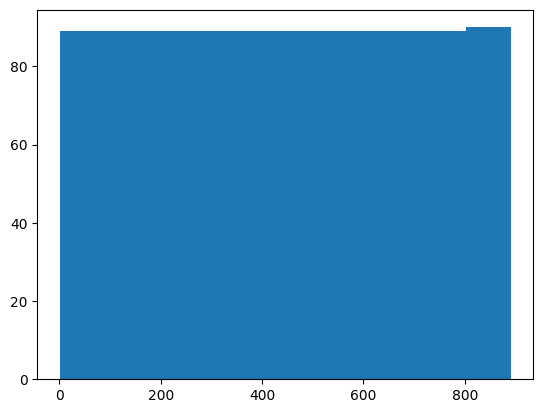

In [11]:
PassengerId = datos_entrenamiento['PassengerId']
plt.hist(PassengerId)
plt.show()

Según lo que vemos, tenemos muchas identificaciones del pasajero debido a que el máximo es 891 y el mínimo es 1, ya que cada uno cuenta con su propio Id, de acuerdo a como se puede ver con el método *value_counts*, además el histograma no nos proporciona información relevante; como era de esperarse

In [12]:
datos_entrenamiento.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [13]:
datos_entrenamiento['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

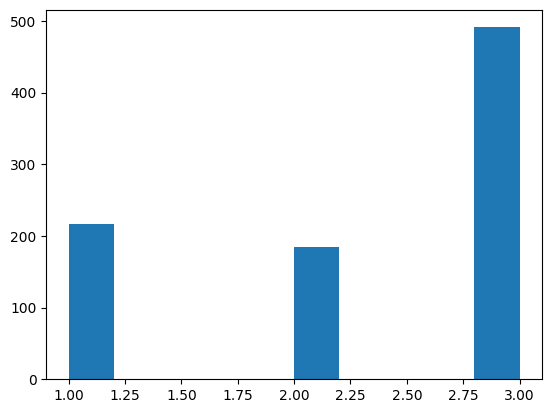

In [14]:
Pclass = datos_entrenamiento['Pclass']
plt.hist(Pclass)
plt.show()

En este caso vemos que tenemos un minimo y un máximo claros, además que hay un conteo respecto de las tres clases, y por último el histograma permite evidenciar como están distribuidos los datos

In [15]:
datos_entrenamiento.Name.describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [16]:
datos_entrenamiento['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

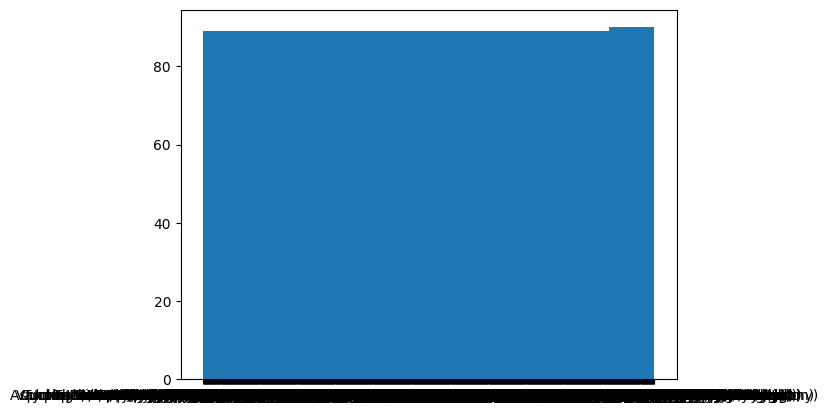

In [17]:
Name = datos_entrenamiento['Name']
plt.hist(Name)
plt.show()

Al igual que con la identificación esta columna no aporta datos significativos

In [18]:
datos_entrenamiento.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [19]:
datos_entrenamiento['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

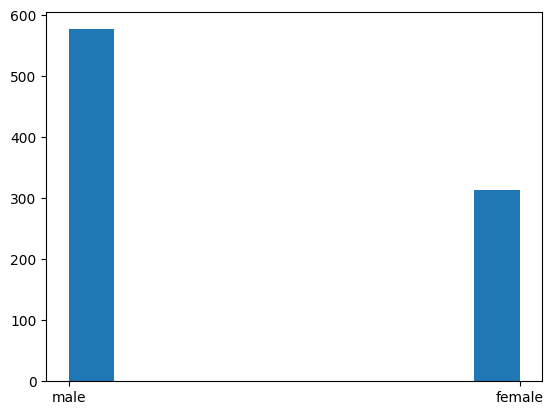

In [20]:
Sex = datos_entrenamiento['Sex']
plt.hist(Sex)
plt.show()

En este casi tenemos una distribución de datos de acuerdo al sexo de cada uno, como un respectivo conteo de los mismos

In [21]:
datos_entrenamiento.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
datos_entrenamiento['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

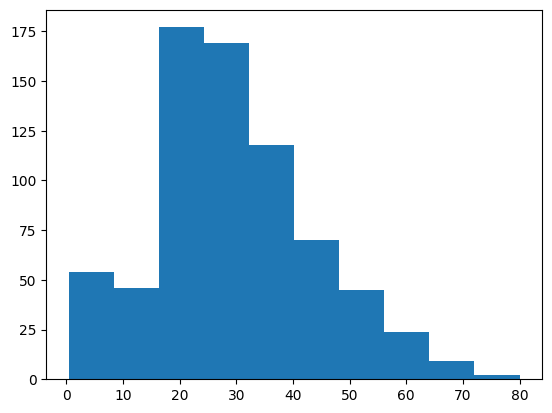

In [23]:
Age = datos_entrenamiento['Age']
plt.hist(Age)
plt.show()

En este caso vemos que aunque hay pocos datos respecto de las edades, podemos clasificarlos en intervalos posteriormente, por lo tanto tenemos información relevante

In [24]:
datos_entrenamiento.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [25]:
datos_entrenamiento['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

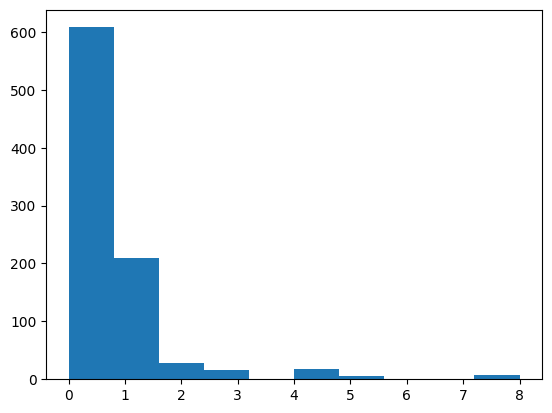

In [26]:
SibSp = datos_entrenamiento['SibSp']
plt.hist(SibSp)
plt.show()

Aunque la mayoría de las personas a bordo del barco no tienen hermanos, puede que esta columna no nos aporte mucha información a menos que los supervivientes sean hermanos, y que estos marquen un dato relevante

In [27]:
datos_entrenamiento['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [28]:
datos_entrenamiento['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

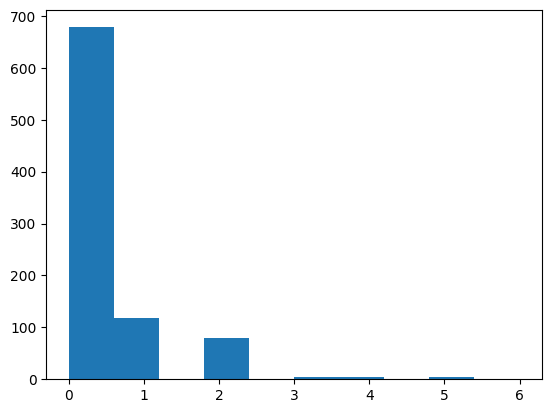

In [29]:
Parch = datos_entrenamiento['Parch']
plt.hist(Parch)
plt.show()

Aunque la mayoría de las personas no tienen hijos, también sería interesante si hay alguna relevancia entre los grupos familiares a la hora de sobrevivir

In [30]:
datos_entrenamiento['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [31]:
datos_entrenamiento['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

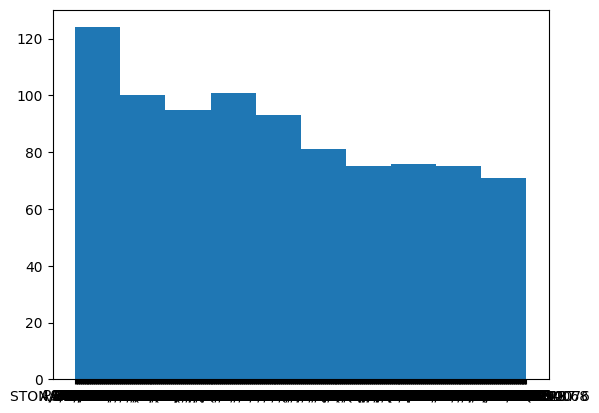

In [32]:
ticket = datos_entrenamiento['Ticket']
plt.hist(ticket)
plt.show()

En este caso se supondría que el número de boleta para cada uno de los diferentes pasajeros debería ser diferente, así como su Id, pero quizás fue un error que haya algunos datos repetidos, por lo tanto está columna no debería aportar datos relevantes

In [33]:
datos_entrenamiento['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [34]:
datos_entrenamiento['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

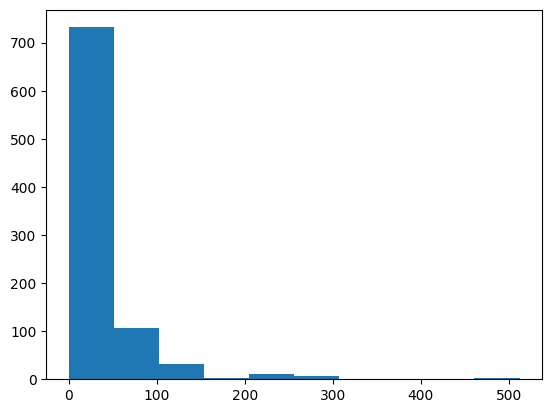

In [35]:
Fare = datos_entrenamiento['Fare']
plt.hist(Fare)
plt.show()

Acá damos cuenta el valor de la boleta, por lo tanto la mayoría de las personas la boleta no tiene mucho valor a comparación de la poca cantidad de pasajeros que tenían boletos mas caros, por lo tanto está columna estaría aportando un valor relevante a la hora de predecir los pasajeros sobrevivientes

In [36]:
datos_entrenamiento['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [37]:
datos_entrenamiento['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Para esta columna es dificil saber cuál es la columna que tenía cada uno de los pasajeros debido a la poca cantidad de datos que hay, por lo tanto obtener un histograma, lo más probable es que genere un error

In [38]:
datos_entrenamiento['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [39]:
datos_entrenamiento['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [40]:
datos_entrenamiento['Embarked'].replace(['S','C','Q'],[1,2,3], inplace = True)
datos_entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0


In [41]:
datos_entrenamiento['Embarked'].value_counts()

Embarked
1.0    644
2.0    168
3.0     77
Name: count, dtype: int64

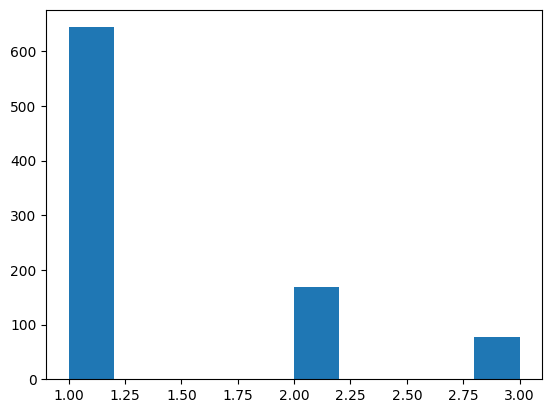

In [42]:
Embarked = datos_entrenamiento['Embarked']
plt.hist(Embarked)
plt.show()

Renombrando las caracteristicas de donde se embarco se obtiene que la mayoría de las personas embarcaron el viaje en Inglaterra, a comparación de los otros, por lo tanto no vamos a tener estos datos en cuenta, debido a que puede ser un poco irrelevantes el sitio desde el que empezaron el viaje, a menos que quisieramos ver la taza de supervivencia que se tuvo en cuánto a porcentaje por cada país

In [43]:
datos_entrenamiento['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [44]:
datos_entrenamiento['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

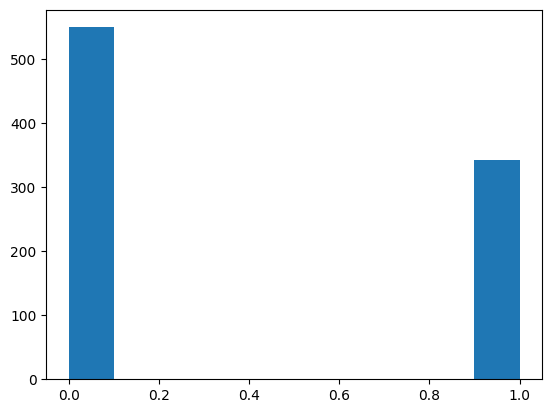

In [45]:
Survived= datos_entrenamiento['Survived']
plt.hist(Survived)
plt.show()

Ahora procederemos a guardar las columnas relevantes en un nuevo data frame, donde no incluiremos aquellas columnas que no nos aportan información significativa

In [46]:
datos_entrenamiento_1 = datos_entrenamiento.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
datos_entrenamiento_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,1.0
1,1,1,female,38.0,1,0,71.2833,2.0
2,1,3,female,26.0,0,0,7.9250,1.0
3,1,1,female,35.0,1,0,53.1000,1.0
4,0,3,male,35.0,0,0,8.0500,1.0


In [47]:
datos_prueba_1 = datos_prueba.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
datos_prueba_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [48]:
datos_prueba_1['Embarked'].replace(['S','C','Q'],[1,2,3], inplace = True)
datos_prueba_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,3
1,3,female,47.0,1,0,7.0000,1
2,2,male,62.0,0,0,9.6875,3
3,3,male,27.0,0,0,8.6625,1
4,3,female,22.0,1,1,12.2875,1


Ahora vamos a comparar respecto a la columna de los supervivientes cada una de las columnas que nos pueden aportar información relevante:

Text(0.5, 1.0, 'Distribución de muerte de todas las clases')

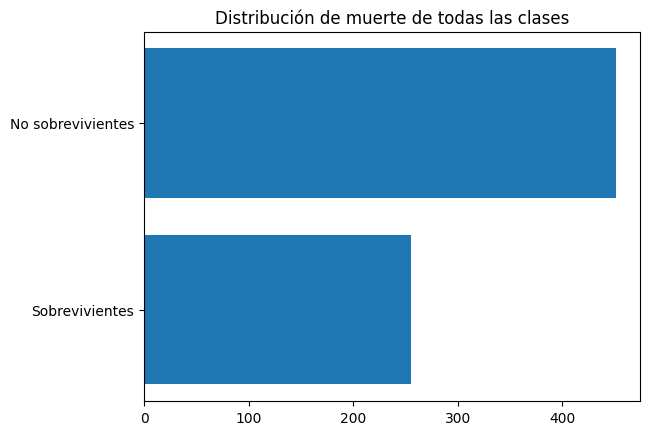

In [49]:
class_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Pclass)].count()
class_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Pclass)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [class_vive,class_no_vive])
plt.title('Distribución de muerte de todas las clases')

Text(0.5, 1.0, 'Distribución de muerte de todas las clases')

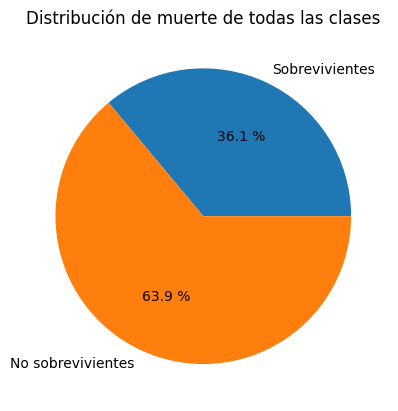

In [50]:
plt.pie([class_vive, class_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte de todas las clases')

Vemos que los supervivientes representan el $36.1\%$ y el $63.9\%$ son los no sobrevivientes, ahora vamos a ver como es el porcentaje por cada una de las diferentes clases disponibles dentro del barco

Text(0.5, 1.0, 'Distribución de muerte en primera clase')

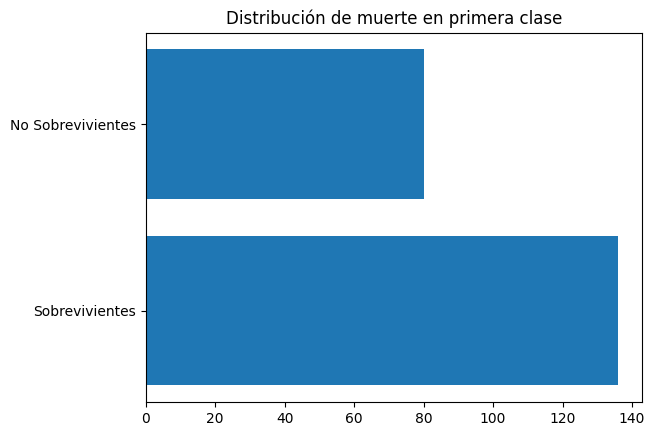

In [51]:
#Observación de primera clase
class_1_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Pclass == 1)].count()
class_1_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Pclass == 1)].count()
plt.barh(['Sobrevivientes', 'No Sobrevivientes'], [class_1_vive,class_1_no_vive])
plt.title('Distribución de muerte en primera clase')

Text(0.5, 1.0, 'Distribuación de muerte en primera clase')

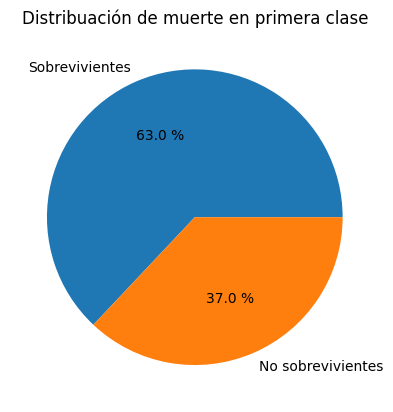

In [52]:
plt.pie([class_1_vive, class_1_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribuación de muerte en primera clase')

Text(0.5, 1.0, 'Distribución de muerte en segunda clase')

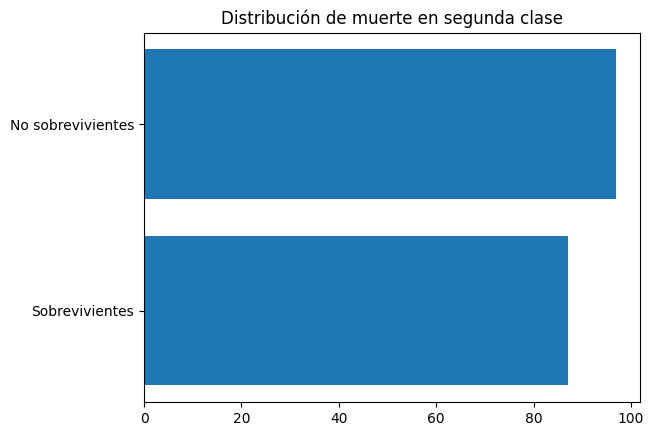

In [53]:
#Observación de segunda clase
class_2_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Pclass == 2)].count()
class_2_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Pclass == 2)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [class_2_vive,class_2_no_vive])
plt.title('Distribución de muerte en segunda clase')

Text(0.5, 1.0, 'Distribuación de muerte en segunda clase')

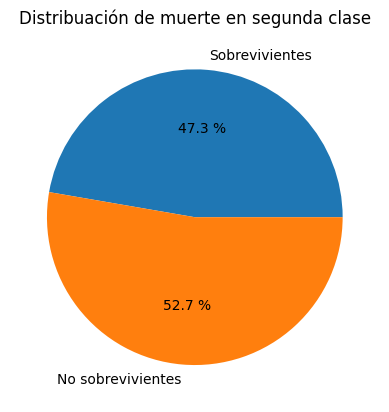

In [54]:
plt.pie([class_2_vive, class_2_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribuación de muerte en segunda clase')

Text(0.5, 1.0, 'Distribución de muerte en tercera clase')

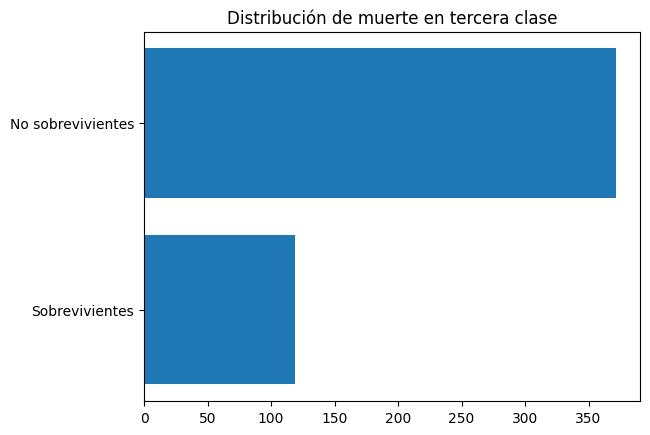

In [55]:
#Observación de tercera clase
class_3_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Pclass == 3)].count()
class_3_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Pclass == 3)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [class_3_vive,class_3_no_vive])
plt.title('Distribución de muerte en tercera clase')

Text(0.5, 1.0, 'Distribuación de muerte en tercera clase')

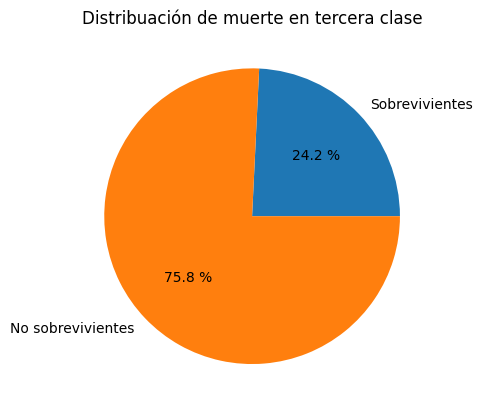

In [56]:
plt.pie([class_3_vive, class_3_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribuación de muerte en tercera clase')

Vemos que existe una relación de acuerdo a la clase con el numero de supervivientes, donde a mejor clase, mejor será la oportunidad de sobrevivir

Text(0.5, 1.0, 'Distribución de muerte dependiendo del sexo')

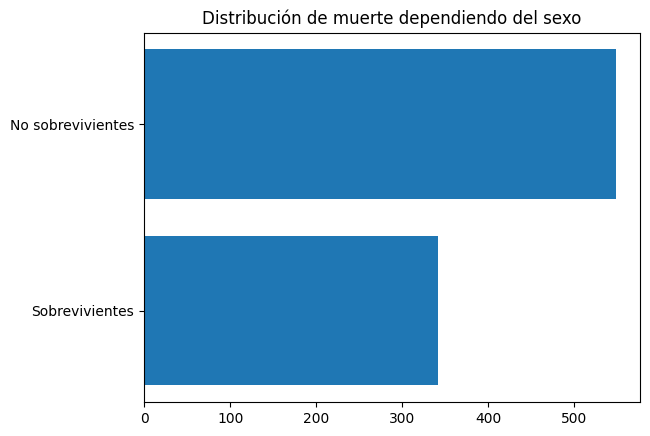

In [57]:
sexo_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Sex)].count()
sexo_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Sex)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [sexo_vive,sexo_no_vive])
plt.title('Distribución de muerte dependiendo del sexo')

Text(0.5, 1.0, 'Hombre y mujeres supervivientes')

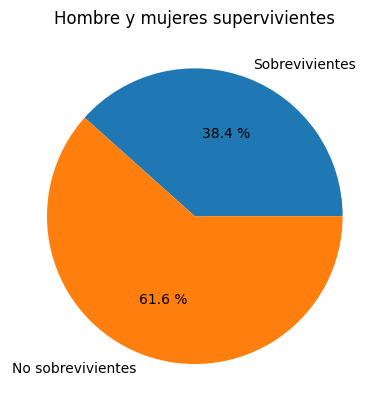

In [58]:
plt.pie([sexo_vive, sexo_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Hombre y mujeres supervivientes')

Text(0.5, 1.0, 'Distribución de muerte de mujeres')

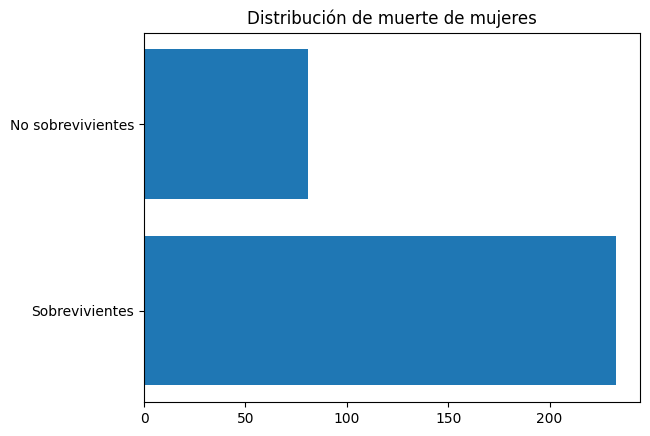

In [59]:
sexo_femenino_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Sex.str.contains('female'))].count()
sexo_femenino_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Sex.str.contains('female'))].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [sexo_femenino_vive,sexo_femenino_no_vive])
plt.title('Distribución de muerte de mujeres')

Text(0.5, 1.0, 'Distribución de muerte de mujeres')

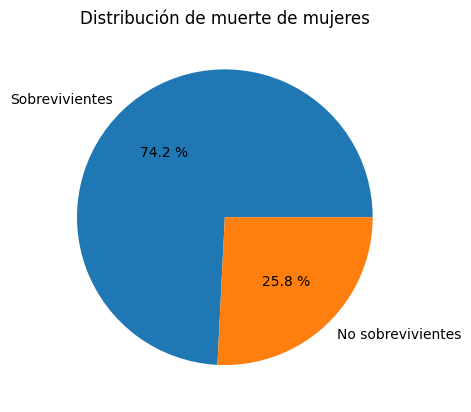

In [60]:
plt.pie([sexo_femenino_vive, sexo_femenino_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte de mujeres')

Text(0.5, 1.0, 'Distribución de muerte de hombres')

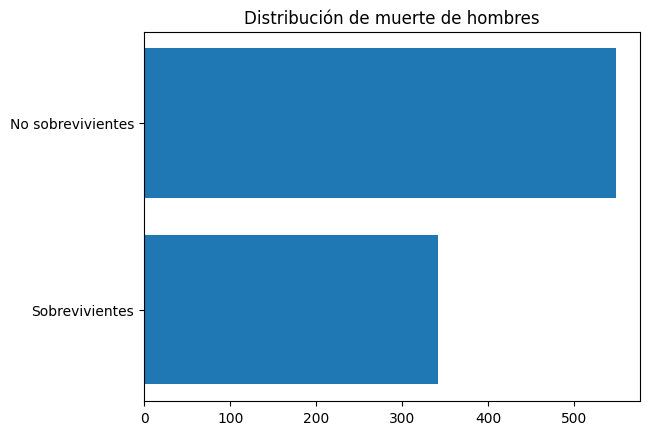

In [61]:
sexo_masculino_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Sex.str.contains('male'))].count()
sexo_masculino_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Sex.str.contains('male'))].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [sexo_masculino_vive,sexo_masculino_no_vive])
plt.title('Distribución de muerte de hombres')

Text(0.5, 1.0, 'Distribución de muerte de mujeres')

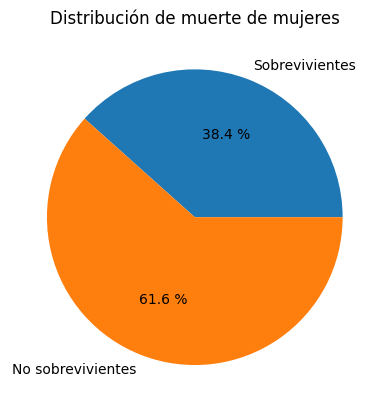

In [62]:
plt.pie([sexo_masculino_vive, sexo_masculino_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte de mujeres')

Acá damos cuenta que la mayoría de las supervivientes son mujeres, por lo tanto podemos comparar respecto a porcentajes la cantidad de no supervivientes y de supervivientes por cada uno de los dos sexos

Text(0.5, 1.0, 'Distribución de muerte hombres y mujeres')

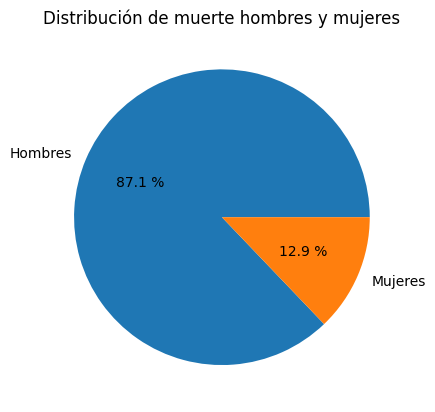

In [63]:
sexo_masculino_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Sex.str.contains('male'))].count()
sexo_femenino_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Sex.str.contains('female'))].count()
plt.pie([sexo_masculino_no_vive, sexo_femenino_no_vive], labels=['Hombres', 'Mujeres'],autopct="%0.1f %%" )
plt.title('Distribución de muerte hombres y mujeres')

Text(0.5, 1.0, 'Distribución de supervivientes hombres y mujeres')

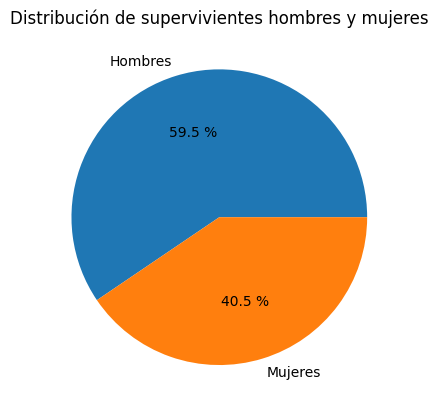

In [64]:
sexo_masculino_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Sex.str.contains('male'))].count()
sexo_femenino_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Sex.str.contains('female'))].count()
plt.pie([sexo_masculino_vive, sexo_femenino_vive], labels=['Hombres', 'Mujeres'],autopct="%0.1f %%" )
plt.title('Distribución de supervivientes hombres y mujeres')

Como nos habiamos dado cuenta anteriormente, había una mayor cantidad de hombres que de mujeres dentro de la embarcación, pero aún así el porcentaje de muertes y de supervivientes es mayor en hombres que en mujeres, esto quiere decir que las mujeres tuvieron mayor suerte a la hora de sobrevivir que los hombres

Text(0.5, 1.0, 'Distribución de muerte dependiendo de la edad')

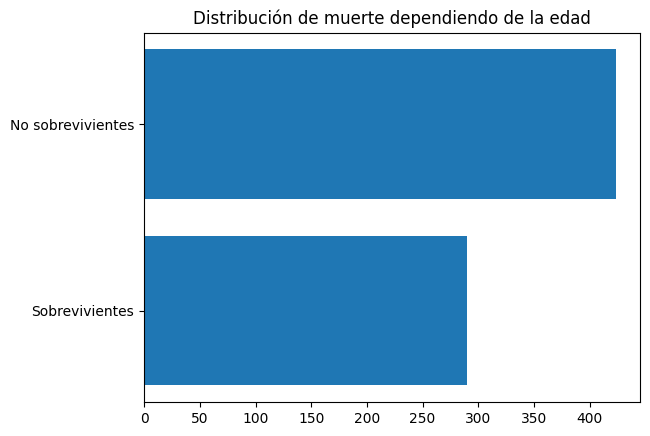

In [65]:
edad_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Age)].count()
edad_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Age)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [edad_vive,edad_no_vive])
plt.title('Distribución de muerte dependiendo de la edad')

Text(0.5, 1.0, 'Distribución de muerte en menores de edad')

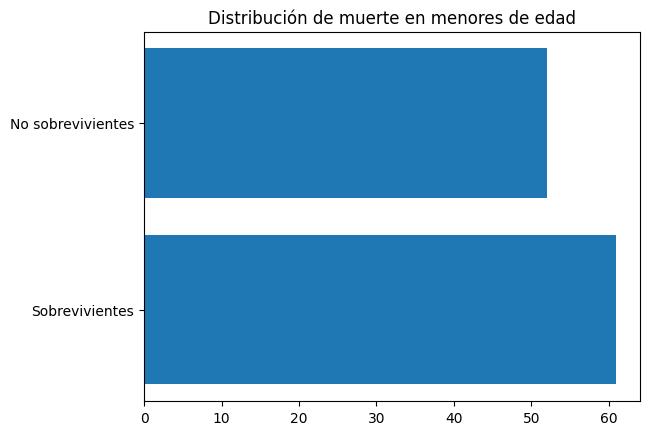

In [66]:
menores_edad_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Age < 18)].count()
menores_edad_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Age < 18)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [menores_edad_vive,menores_edad_no_vive])
plt.title('Distribución de muerte en menores de edad')

Text(0.5, 1.0, 'Distribución de muerte de menores de edad')

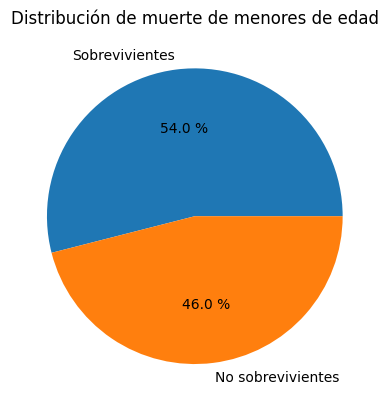

In [67]:
plt.pie([menores_edad_vive, menores_edad_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte de menores de edad')

Text(0.5, 1.0, 'Distribución de muerte en la tercera edad')

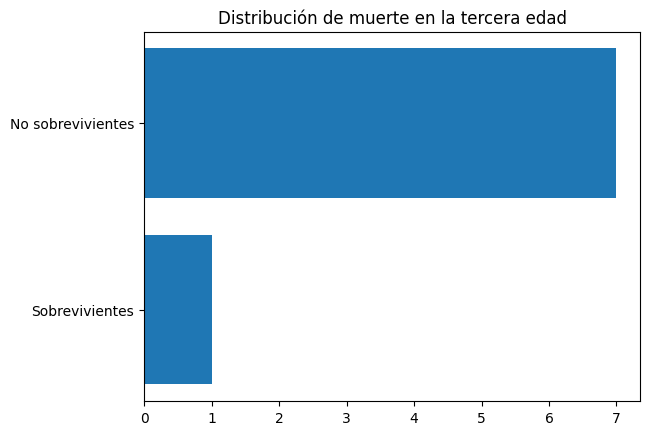

In [68]:
tercera_edad_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Age > 65)].count()
tercera_edad_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Age > 65)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [tercera_edad_vive,tercera_edad_no_vive])
plt.title('Distribución de muerte en la tercera edad')

Text(0.5, 1.0, 'Distribución de muerte de la tercera edad')

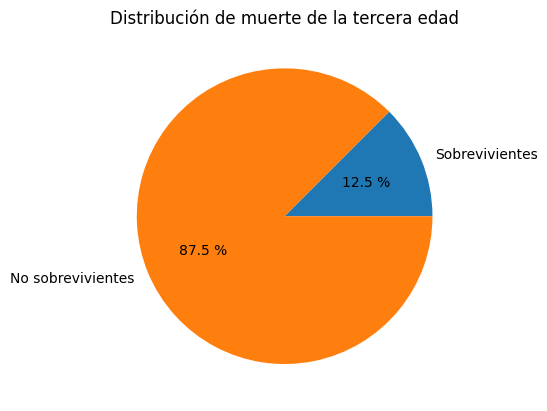

In [69]:
plt.pie([tercera_edad_vive, tercera_edad_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte de la tercera edad')

Text(0.5, 1.0, 'Distribución de muerte en los adultos')

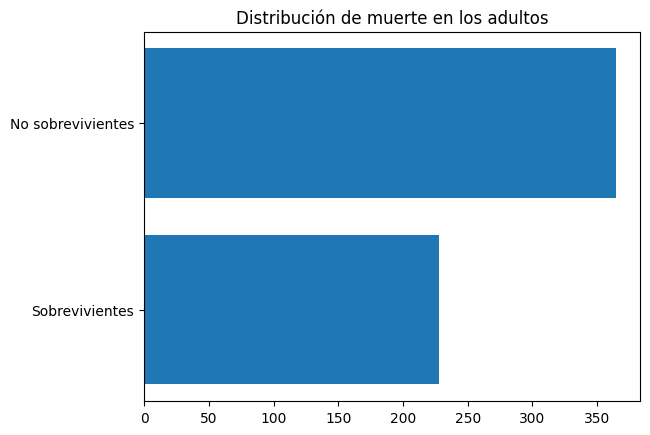

In [70]:
adultos_edad_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Age>=18)&(datos_entrenamiento_1.Age<=65)].count()
adultos_edad_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Age>=18)&(datos_entrenamiento_1.Age<=65)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [adultos_edad_vive,adultos_edad_no_vive])
plt.title('Distribución de muerte en los adultos')

Text(0.5, 1.0, 'Distribución de muerte de adultos')

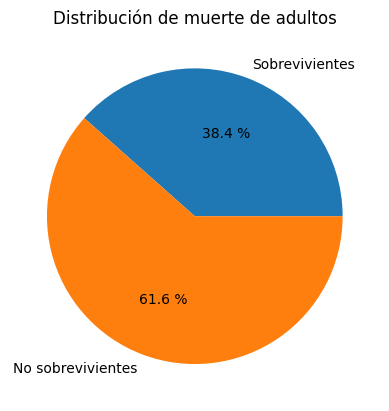

In [71]:
plt.pie([adultos_edad_vive, adultos_edad_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte de adultos')

Text(0.5, 1.0, 'Distribución de muerte dependiendo de la cantidad de hermanos')

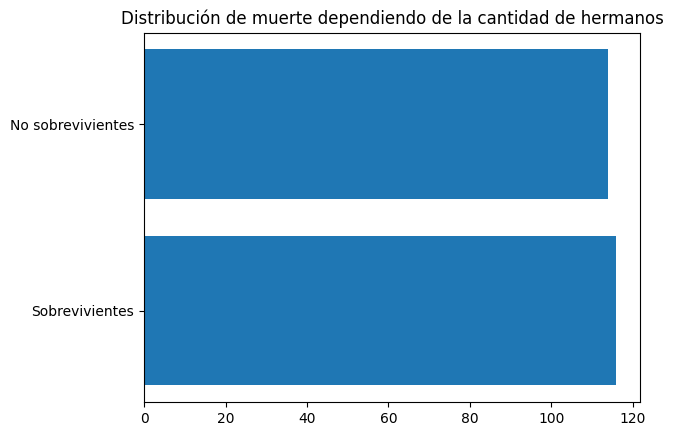

In [72]:
hermanos_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.SibSp)].count()
hermanos_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.SibSp)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [hermanos_vive,hermanos_no_vive])
plt.title('Distribución de muerte dependiendo de la cantidad de hermanos')

Text(0.5, 1.0, 'Distribución de muerte dependiendo de la cantidad de hermanos')

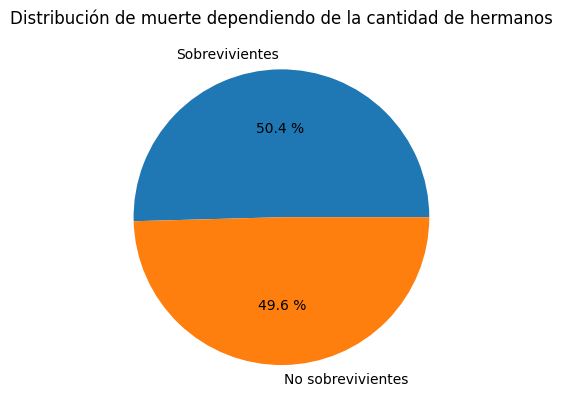

In [73]:
plt.pie([hermanos_vive, hermanos_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte dependiendo de la cantidad de hermanos')

Acá podemos notar que los mas jovenes, en este caso los niños tuvieron mas porcentaje para sobrevivir, a comparación de los adultos y por último las personas de la tercera edad, por lo tanto se puede concluir, que se intenta preservar a los más jóvenes, dado que tienen mas futuro, a comparación de aquellos que ya han vivido una larga vida

Text(0.5, 1.0, 'Distribución de muerte dependiendo de pasajeros sin hermanos')

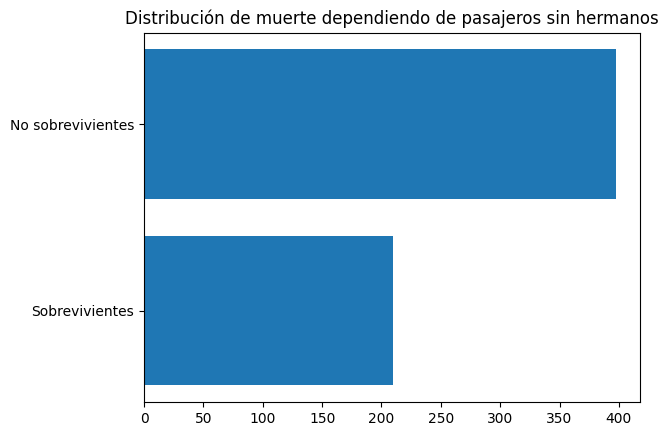

In [74]:
sin_hermanos_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.SibSp==0)].count()
sin_hermanos_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.SibSp==0)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [sin_hermanos_vive,sin_hermanos_no_vive])
plt.title('Distribución de muerte dependiendo de pasajeros sin hermanos')

Text(0.5, 1.0, 'Distribución de pasajeros sin hermanos')

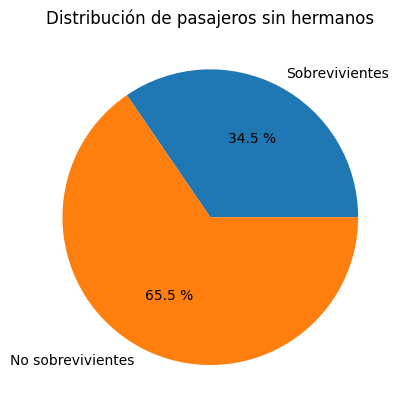

In [75]:
plt.pie([sin_hermanos_vive, sin_hermanos_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de pasajeros sin hermanos')

Text(0.5, 1.0, 'Distribución de muerte de pasajeros con hermanos')

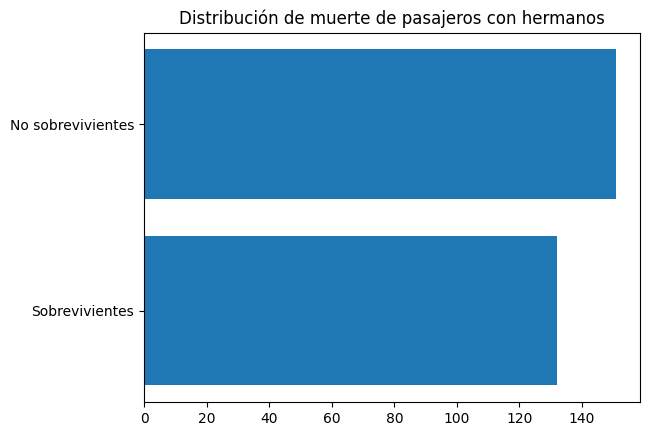

In [76]:
sin_hermanos_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.SibSp>0)].count()
sin_hermanos_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.SibSp>0)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [sin_hermanos_vive,sin_hermanos_no_vive])
plt.title('Distribución de muerte de pasajeros con hermanos')

Text(0.5, 1.0, 'Distribución de muerte de pasajeros con hermanos')

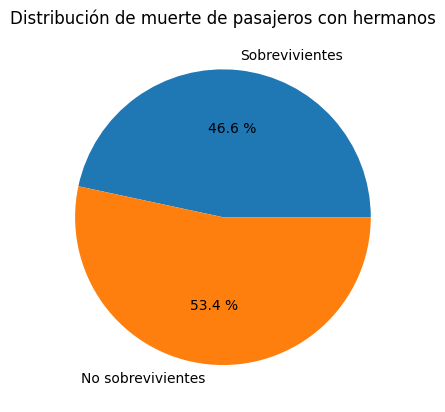

In [77]:
plt.pie([sin_hermanos_vive, sin_hermanos_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte de pasajeros con hermanos')

Esto nos da a entender que a medida que se tienen hermanos hay mas posibilidades de sobrevivir, posiblemente porque entre la familia se pueda ayudar y así existir mas supervivientes

Text(0.5, 1.0, 'Distribución de muerte dependiendo de si se tiene hijos o no')

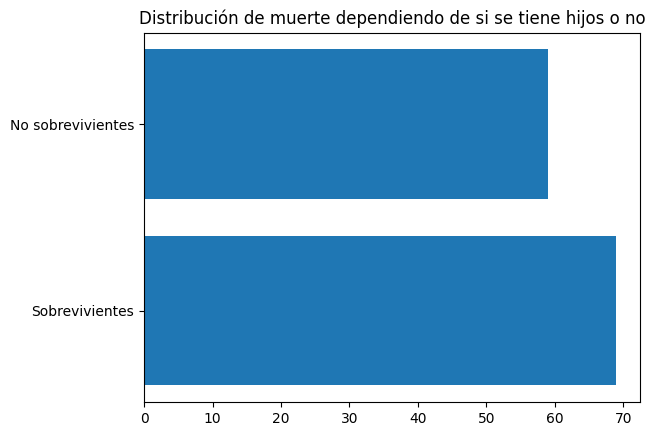

In [78]:
hijos_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Parch)].count()
hijos_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Parch)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [hijos_vive,hijos_no_vive])
plt.title('Distribución de muerte dependiendo de si se tiene hijos o no')

Text(0.5, 1.0, 'Distribución de muerte dependiendo de si se tiene hijos o no')

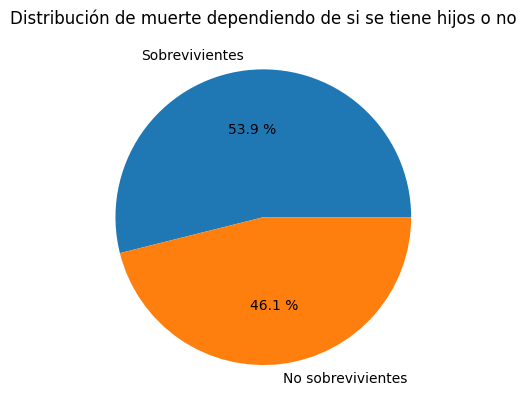

In [79]:
plt.pie([hijos_vive, hijos_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte dependiendo de si se tiene hijos o no')

Text(0.5, 1.0, 'Distribución de muerte dependiendo de si no tiene hijos')

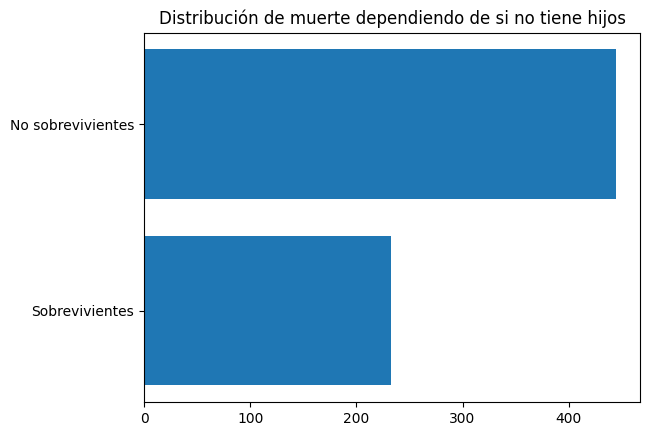

In [80]:
no_hijos_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Parch==0)].count()
no_hijos_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Parch==0)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [no_hijos_vive,no_hijos_no_vive])
plt.title('Distribución de muerte dependiendo de si no tiene hijos')

Text(0.5, 1.0, 'Distribución de muerte dependiendo de si no tiene hijos')

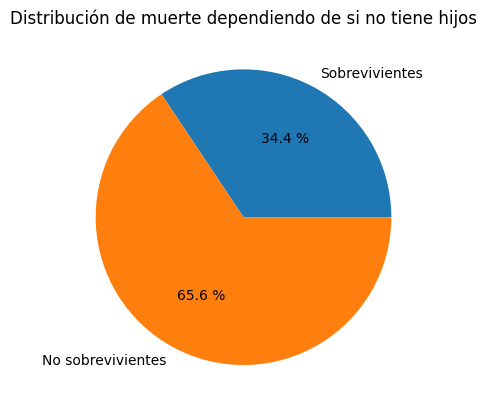

In [81]:
plt.pie([no_hijos_vive, no_hijos_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte dependiendo de si no tiene hijos')

Text(0.5, 1.0, 'Distribución de muerte dependiendo de si tiene hijos')

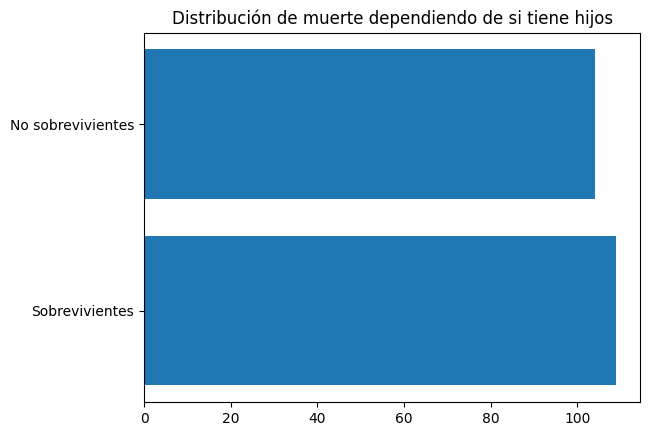

In [82]:
si_hijos_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Parch>0)].count()
si_hijos_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Parch>0)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [si_hijos_vive,si_hijos_no_vive])
plt.title('Distribución de muerte dependiendo de si tiene hijos')

Text(0.5, 1.0, 'Distribución de muerte dependiendo de si tiene hijos')

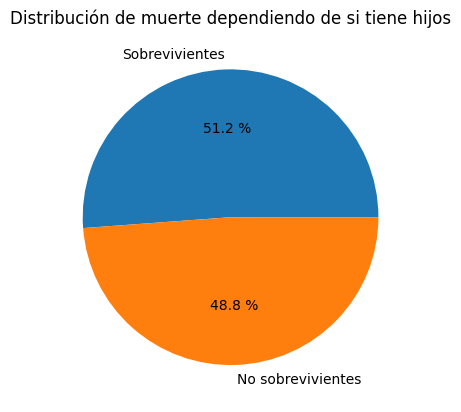

In [83]:
plt.pie([si_hijos_vive, si_hijos_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte dependiendo de si tiene hijos')

Hasta este punto y en relación con el número de hermanos hay mas supervivencia si hay familias con hijos, debido a que se va a garantizar de cierta forma la supervivencia de aquellos que puedan tener un mejor futuro, además se espera que el número de hermanos y el número de hijos tengan una fuerte correlación de acuerdo a estos datos

Text(0.5, 1.0, 'Distribución de muerte dependiendo del costo del boleto')

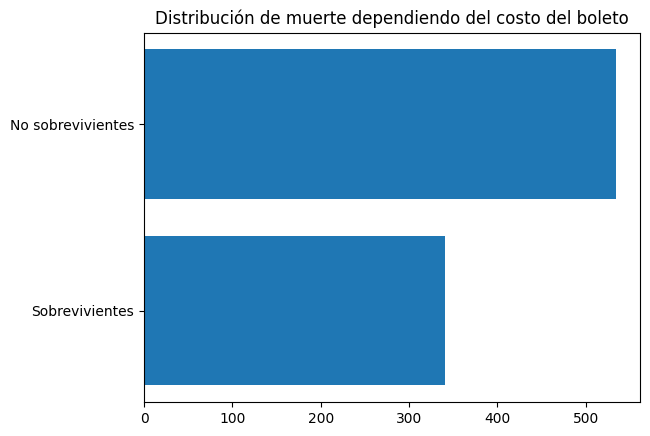

In [84]:
boleto_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Fare)].count()
boleto_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Fare)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [boleto_vive,boleto_no_vive])
plt.title('Distribución de muerte dependiendo del costo del boleto')

Text(0.5, 1.0, 'Distribución de muerte dependiendo del costo del boleto')

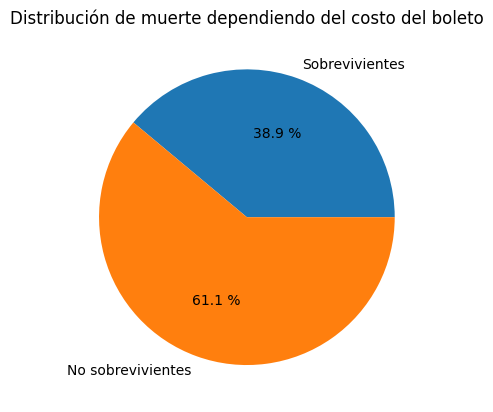

In [85]:
plt.pie([boleto_vive, boleto_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte dependiendo del costo del boleto')

Text(0.5, 1.0, 'Distribución de muerte si el boleto es caro')

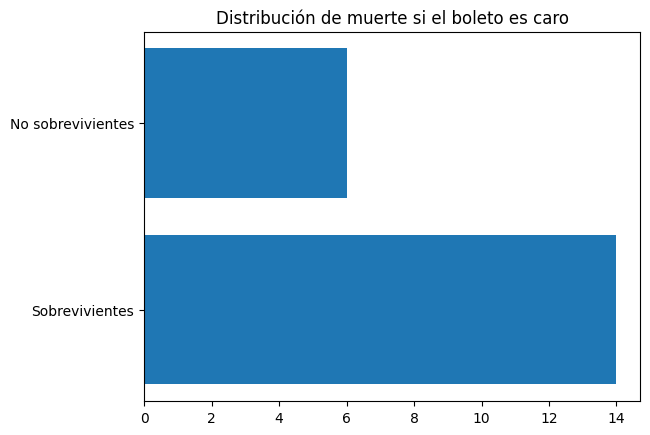

In [86]:
#Considerando un boleto caro por encima de 200 dolarés
boleto_caro_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Fare>200)].count()
boleto_caro_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Fare>200)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [boleto_caro_vive,boleto_caro_no_vive])
plt.title('Distribución de muerte si el boleto es caro')

Text(0.5, 1.0, 'Distribución de muerte dependiendo del costo del boleto')

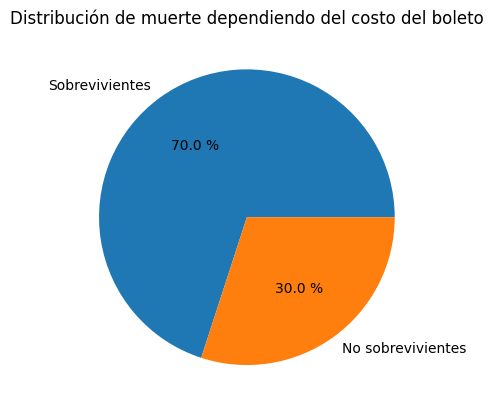

In [87]:
plt.pie([boleto_caro_vive, boleto_caro_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte dependiendo del costo del boleto')

Text(0.5, 1.0, 'Distribución de muerte si el boleto es barato')

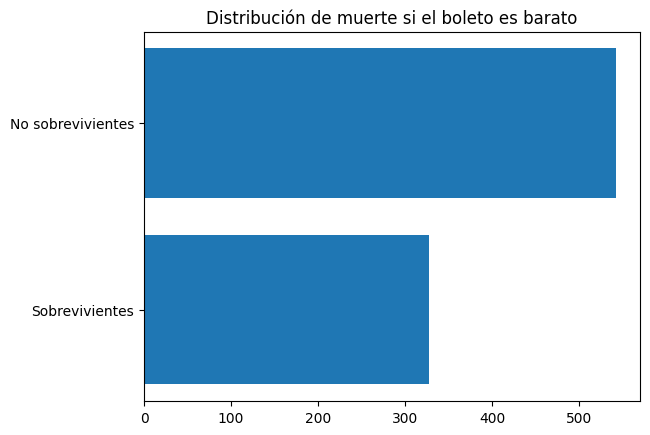

In [88]:
#Considerando un boleto barato por debajo de 200 dolarés
boleto_barato_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Fare<=200)].count()
boleto_barato_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Fare<=200)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [boleto_barato_vive,boleto_barato_no_vive])
plt.title('Distribución de muerte si el boleto es barato')

Text(0.5, 1.0, 'Distribución de muerte dependiendo del costo del boleto')

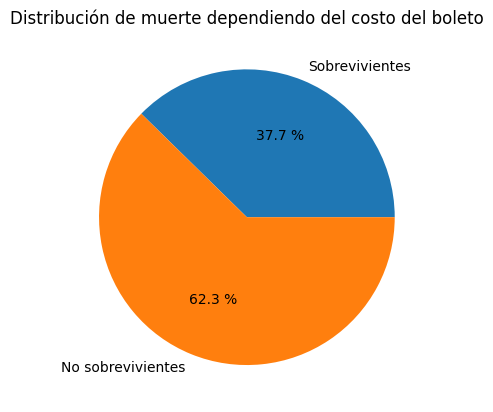

In [89]:
plt.pie([boleto_barato_vive, boleto_barato_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte dependiendo del costo del boleto')

Por lo tanto si se cuenta con un boleto caro las probabilidades de sobrevivir aumentan, en cambio a si es un boleto barato

Text(0.5, 1.0, 'Distribución de muerte dependiendo del lugar de embarcación')

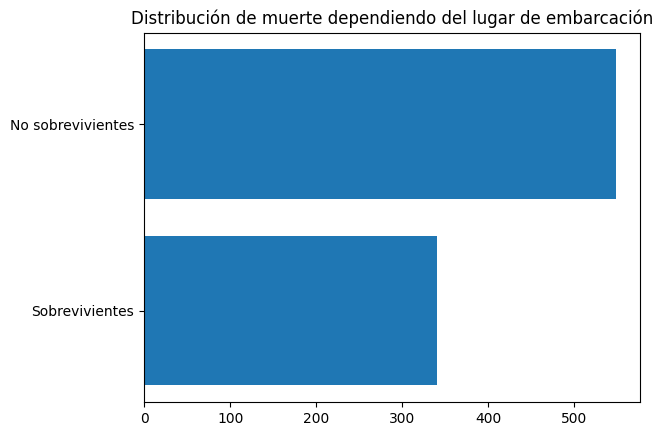

In [90]:
lugar_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Embarked)].count()
lugar_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Embarked)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [lugar_vive,lugar_no_vive])
plt.title('Distribución de muerte dependiendo del lugar de embarcación')

Text(0.5, 1.0, 'Distribución de muerte dependiendo del costo del boleto')

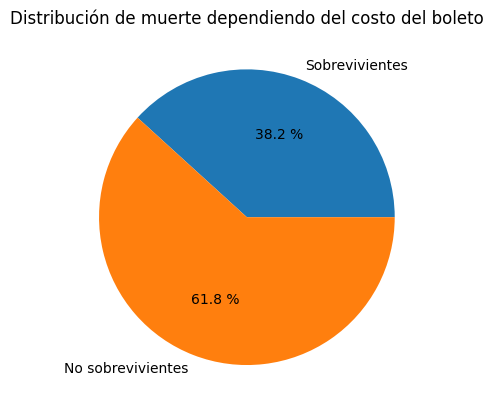

In [91]:
plt.pie([lugar_vive, lugar_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte dependiendo del costo del boleto')

Text(0.5, 1.0, 'Distribución de muerte si embarco en Inglaterra')

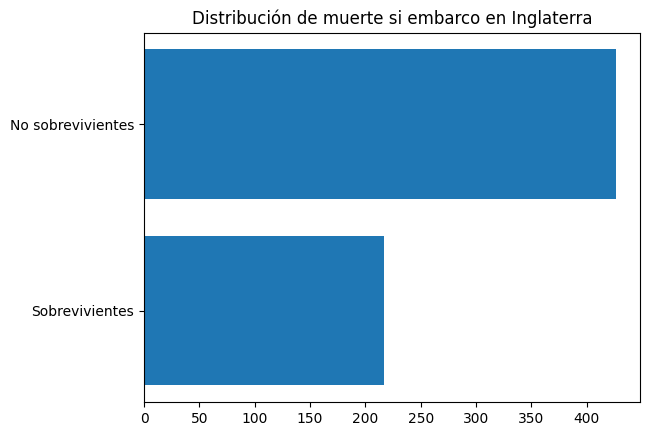

In [92]:
Viene_Inglaterra_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Embarked==1)].count()
Viene_Inglaterra_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Embarked==1)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [Viene_Inglaterra_vive,Viene_Inglaterra_no_vive])
plt.title('Distribución de muerte si embarco en Inglaterra')

Text(0.5, 1.0, 'Distribución de muerte si embarco en Inglaterra')

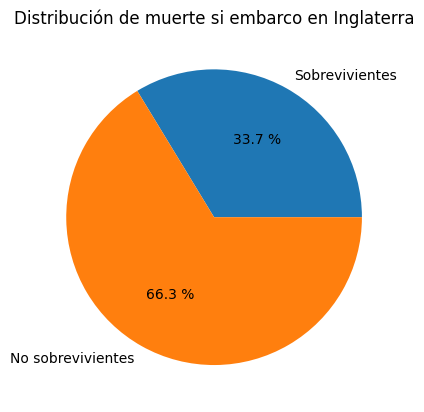

In [93]:
plt.pie([Viene_Inglaterra_vive,Viene_Inglaterra_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte si embarco en Inglaterra')

Text(0.5, 1.0, 'Distribución de muerte si embarco en Francia')

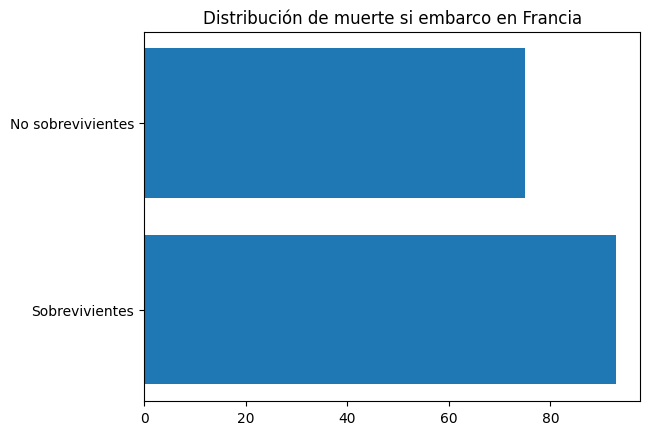

In [94]:
Viene_Francia_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Embarked==2)].count()
Viene_Francia_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Embarked==2)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [Viene_Francia_vive,Viene_Francia_no_vive])
plt.title('Distribución de muerte si embarco en Francia')

Text(0.5, 1.0, 'Distribución de muerte si embarco en Francia')

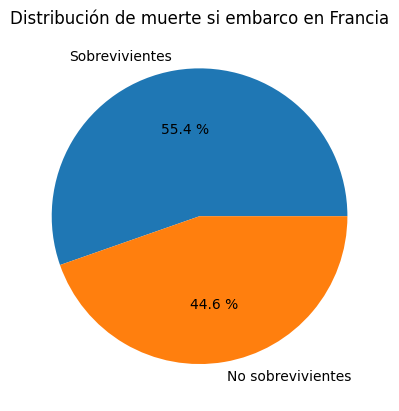

In [95]:
plt.pie([Viene_Francia_vive,Viene_Francia_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte si embarco en Francia')

Text(0.5, 1.0, 'Distribución de muerte si embarco en Irlanda')

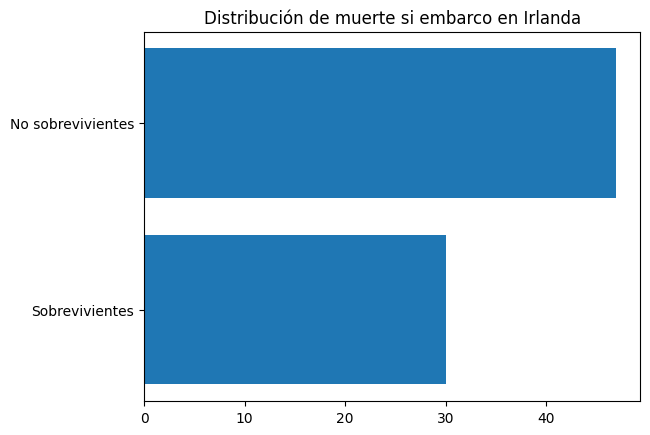

In [96]:
Viene_Irlanda_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 1)&(datos_entrenamiento_1.Embarked==3)].count()
Viene_Irlanda_no_vive = datos_entrenamiento_1.Survived[(datos_entrenamiento_1.Survived == 0)&(datos_entrenamiento_1.Embarked==3)].count()
plt.barh(['Sobrevivientes', 'No sobrevivientes'], [Viene_Irlanda_vive,Viene_Irlanda_no_vive])
plt.title('Distribución de muerte si embarco en Irlanda')

Text(0.5, 1.0, 'Distribución de muerte si embarco en Irlanda')

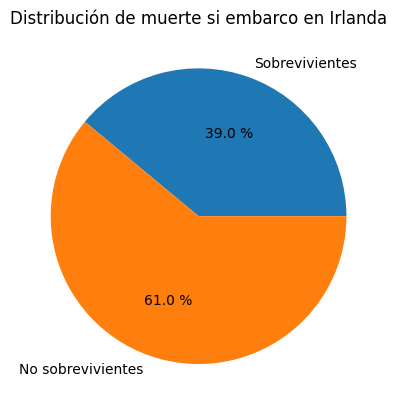

In [97]:
plt.pie([Viene_Irlanda_vive,Viene_Irlanda_no_vive], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" )
plt.title('Distribución de muerte si embarco en Irlanda')

De acuerdo a estos datos son las personas que embarcaron en Francia las que tuvieron mayor oportunidad de sobrevivir, esto genera la duda si aquellas personas tenian mas ingresos, y estaban en primera clase, además de si tenian familia dentro de la embarcación

# Preparación de los datos

## Datos faltantes
A continuación vamos a preparar los datos para posteriormente realizar el respectivo analisis, así que lo primero que vamos a realizar es ver cuántos valores nulos tenemos

In [98]:
print(datos_entrenamiento_1['Pclass'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_1['Pclass'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [99]:
print(datos_entrenamiento_1['Sex'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_1['Sex'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [100]:
print(datos_entrenamiento_1['Age'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_1['Age'].isnull().sum())#Cantidad de valores vacíos en test

177
86


In [101]:
print(datos_entrenamiento_1['SibSp'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_1['SibSp'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [102]:
print(datos_entrenamiento_1['Parch'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_1['Parch'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [103]:
print(datos_entrenamiento_1['Fare'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_1['Fare'].isnull().sum())#Cantidad de valores vacíos en test

0
1


In [104]:
print(datos_entrenamiento_1['Embarked'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_1['Embarked'].isnull().sum())#Cantidad de valores vacíos en test

2
0


En la columna Age tenemos 177 datos faltantes en los datos de entrenamiento y 86 en los datos de prueba, por lo tanto podría cambiarlos por la media de las edades existentes, en Fare en el conjjunto de prueba me falta 1 dato, así que pasaré a realizar el promedio del precio para este dato faltante y en embarked me faltan dos datos en los datos de entrenamiento, así que voy a dejar que sean asignados al azar, para cualquiera de los tres lugares de embarcación

In [105]:
promedio_Age = datos_entrenamiento_1['Age'].mean()
datos_entrenamiento_1['Age'].fillna(promedio_Age, inplace = True)
print(datos_entrenamiento_1['Age'].isnull().sum())

#Ahora con el conjunto de prueba
promedio_Age = datos_prueba['Age'].mean()
datos_prueba_1['Age'].fillna(promedio_Age, inplace = True)
print(datos_prueba_1['Age'].isnull().sum())

0
0


In [106]:
promedio_Fare = datos_prueba['Fare'].mean()
datos_prueba_1['Fare'].fillna(promedio_Fare, inplace = True)
print(datos_prueba_1['Fare'].isnull().sum())

0


In [107]:
valor = np.random.randint(1, 4)
datos_entrenamiento_1['Embarked'].fillna(valor, inplace = True)
print(datos_entrenamiento_1['Embarked'].isnull().sum())

0


Ahora vamos a ver que los datos esten completos para poder realizar las respectivas predicciones de acuerdo a diferentes modelos

In [108]:
print(datos_entrenamiento_1.info())
print("----------------------------")
print(datos_prueba_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB
None
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    f

Nos falta por convertir los datos correspondientes a sexo a datos categoricos, así no vamos a generar un error al momento de realizar nuestra matriz de correlación

In [109]:
datos_entrenamiento_1['Sex'].replace(['male','female'],[0,1], inplace = True)
datos_entrenamiento_1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1.0
1,1,1,1,38.000000,1,0,71.2833,2.0
2,1,3,1,26.000000,0,0,7.9250,1.0
3,1,1,1,35.000000,1,0,53.1000,1.0
4,0,3,0,35.000000,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,1.0
887,1,1,1,19.000000,0,0,30.0000,1.0
888,0,3,1,29.699118,1,2,23.4500,1.0
889,1,1,0,26.000000,0,0,30.0000,2.0


In [110]:
datos_prueba_1['Sex'].replace(['male','female'],[0,1], inplace = True)
datos_prueba_1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,3
1,3,1,47.00000,1,0,7.0000,1
2,2,0,62.00000,0,0,9.6875,3
3,3,0,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,1
414,1,1,39.00000,0,0,108.9000,2
415,3,0,38.50000,0,0,7.2500,1
416,3,0,30.27259,0,0,8.0500,1


Vamos a obtener la matriz de correlación para ver si existe alguna relación entre las diferentes columnas dentro de los datos de entrenamiento

<Axes: >

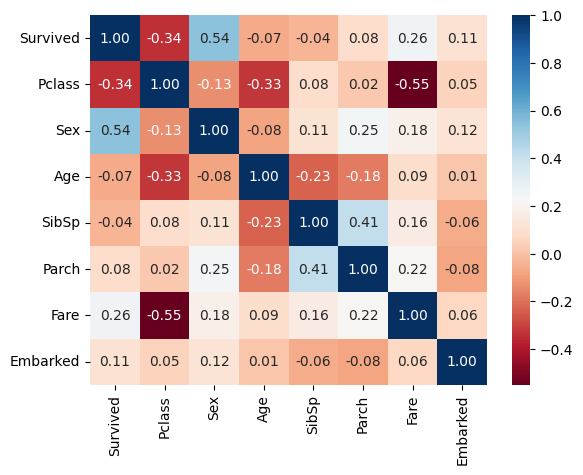

In [111]:
corr = datos_entrenamiento_1.corr()
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

# Realizar predicciones

Empezamos con el modelo de regresión logistica, así que importamos las librerias necesarias

In [112]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [113]:
Y_entrenamiento = datos_entrenamiento_1.loc[:, 'Survived']
X_entrenamiento = datos_entrenamiento_1.drop(['Survived'], axis=1)

In [114]:
#Dividimos los datos para poder entrenar los datos con el conjunto de entrenamiento,
#Y realizar una predicción sobre el mismo
x_train, x_test, y_train, y_test = train_test_split(X_entrenamiento, Y_entrenamiento, test_size=0.3)

## Primer clasificador
Realizamos la primera predicción con el modelo LogisticRegression, y tenemos lo siguiente:

In [115]:
primer_clasificador = linear_model.LogisticRegression(solver='liblinear')
primer_clasificador.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [116]:
prediction = primer_clasificador.predict(x_test)
print(prediction)

[0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 0 0]


In [117]:
print(primer_clasificador.score(x_test, y_test))

0.7835820895522388


In [118]:
X_prueba = datos_prueba_1

In [119]:
Y_prediccion_1 = primer_clasificador.predict(X_prueba)
Y_prediccion_1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Con este modelo obtengo un rendimiento de la clasificación del $81.71\%$

In [120]:
#Notamos este resultado, porque fueron los valores obtenidos por el modelo, 
#por eso tiene un valor de 1
print(primer_clasificador.score(X_prueba, Y_prediccion_1))

1.0


Ahora vamos a graficar la forma como el algoritmo realizo la respectiva clasificación

## Segundo Clasificador
Ahora vamos a pasar con el modelo de DecisionTreeClassifier, y además vamos a dibujar el árbol de decisión

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
segundo_clasificador = DecisionTreeClassifier(max_depth=4)

In [123]:
segundo_clasificador.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [124]:
print(segundo_clasificador.score(x_test, y_test))

0.8059701492537313


Ahora vamos a dibujar los árboles entrenados por el modelo:

[Text(0.45689655172413796, 0.9, 'x[1] <= 0.5\ngini = 0.482\nsamples = 623\nvalue = [371, 252]'),
 Text(0.1896551724137931, 0.7, 'x[2] <= 9.5\ngini = 0.313\nsamples = 397\nvalue = [320, 77]'),
 Text(0.06896551724137931, 0.5, 'x[3] <= 2.0\ngini = 0.48\nsamples = 25\nvalue = [10, 15]'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.10344827586206896, 0.3, 'x[2] <= 3.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.06896551724137931, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.13793103448275862, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3103448275862069, 0.5, 'x[0] <= 1.5\ngini = 0.278\nsamples = 372\nvalue = [310, 62]'),
 Text(0.2413793103448276, 0.3, 'x[2] <= 60.5\ngini = 0.467\nsamples = 86\nvalue = [54, 32]'),
 Text(0.20689655172413793, 0.1, 'gini = 0.484\nsamples = 78\nvalue = [46, 32]'),
 Text(0.27586206896551724, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3793103448275862, 0.3, 'x[5] <= 7.76

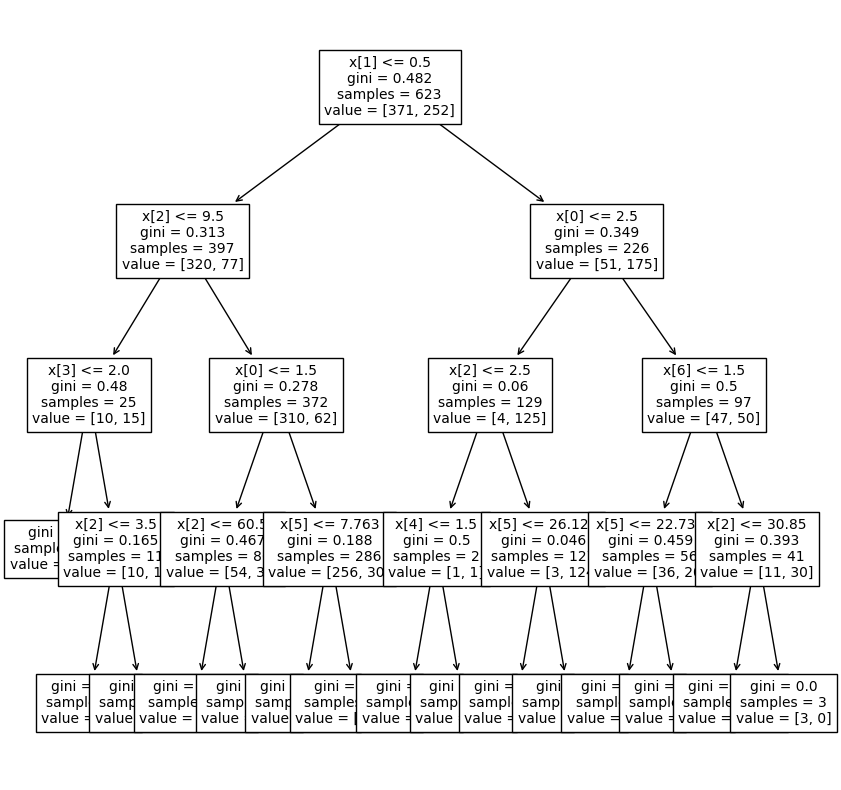

In [125]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(segundo_clasificador, fontsize = 10)

In [126]:
Y_prediccion_2 = segundo_clasificador.predict(X_prueba)
Y_prediccion_2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Con este modelo obtengo un rendimiento de la clasificación del $82.83\%$

## Tercer clasificador

Para esta ocasión vamos a utilizar el modelo *support vector machine*

In [127]:
from sklearn.svm import SVC

In [128]:
tercer_clasificador = SVC(random_state=101)

In [129]:
tercer_clasificador.fit(x_train, y_train)

SVC(random_state=101)

In [130]:
print(tercer_clasificador.score(x_test, y_test))

0.6828358208955224


In [131]:
Y_prediccion_3 = tercer_clasificador.predict(X_prueba)
Y_prediccion_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

Con este modelo obtengo un rendimiento de la clasificación del $69.02\%$

## Cuarto clasificador
Para esta cuarta ocasión voy a utilizar el modelo de *kNeighborClassifier*

In [132]:
from sklearn.neighbors import KNeighborsClassifier
cuarto_clasificador = KNeighborsClassifier(n_neighbors=5)

In [133]:
cuarto_clasificador.fit(x_train, y_train)

KNeighborsClassifier()

In [134]:
print(cuarto_clasificador.score(x_test, y_test))

0.6604477611940298


In [135]:
Y_prediccion_4 = cuarto_clasificador.predict(X_prueba)
Y_prediccion_4

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

Con este modelo obtengo un rendimiento de la clasificación del $66.41\%$

## Quinto Classificador
Para este qiunto clasificador vamos a utilizar *RadiusNeighborsClassifier*

In [136]:
from sklearn.naive_bayes import MultinomialNB
quinto_clasificador = MultinomialNB(alpha=0.01, fit_prior=True)

In [137]:
quinto_clasificador.fit(x_train, y_train)

MultinomialNB(alpha=0.01)

In [138]:
print(quinto_clasificador.score(x_test, y_test))

0.6753731343283582


In [139]:
Y_prediccion_5 = quinto_clasificador.predict(X_prueba)
Y_prediccion_5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

Con este modelo obtengo un rendimiento de la clasificación del $68.65\%$

# Mejor Resultado de este notebook

Vemos que el mejor resultado que se obtiene realizando el proceso de predicción es el correspondiente al segundo clasificador, debido a que tiene un porcentaje de $82.83\%$ de buena clasificación

In [140]:
df_prediccion = datos_prueba.assign(Survived=Y_prediccion_2)
df_prediccion

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [141]:
df_prediccion_1= df_prediccion[["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]]
df_prediccion_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [142]:
df_prediccion_1.to_csv('Prediction_titanic_1.csv')